In [4]:
%matplotlib inline
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import seaborn as sns
import scipy.stats.mstats as mstats

In [5]:
names_hTERT= [
    'hTERT-TP2-R1',
    'hTERT-TP4-R1-1',
    'hTERT-TP4-R1-2',
    'hTERT-TP5-R1',
    'hTERT-TP6-R1'
]
names_PDL=[
    'PDL25-TP2-R1',
    'PDL33-TP4-R1',
    'PDL37-TP5-R1',
    'PDL46-TP6-R1'
]

In [6]:
df1 = pd.DataFrame()
df1_ranked=pd.DataFrame()
for i in range(5):
    eigen=pd.read_csv(names_hTERT[i]+".trans.vecs.tsv",sep='\t')
    df1[names_hTERT[i]]=eigen['E1']
    ranks = mstats.rankdata(np.ma.masked_invalid(eigen['E1']))
    ranks[ranks == 0] = np.nan
    df1_ranked[names_hTERT[i]]=ranks

/home/snehal/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


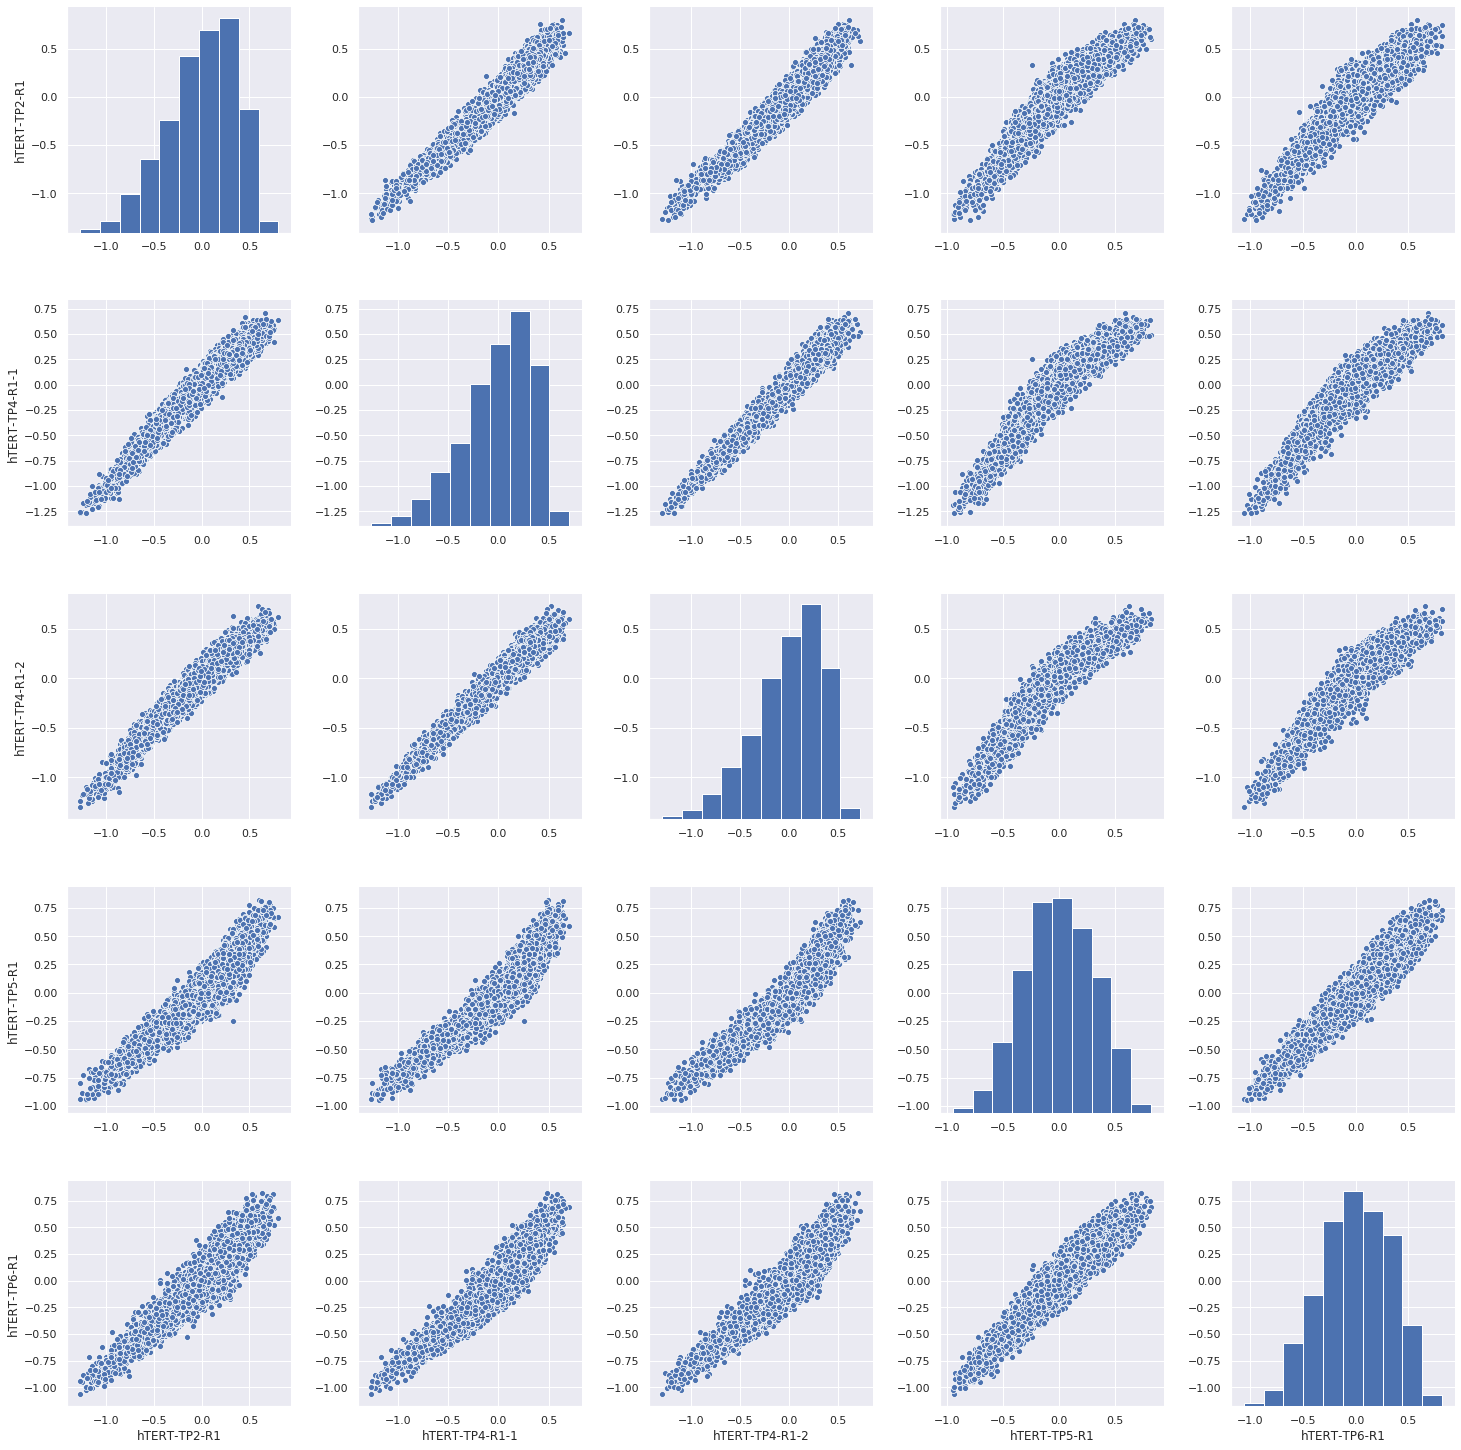

In [7]:
sns.set()
g=sns.pairplot(df1,size=4)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_hTERT)):
    for j in range(len(names_hTERT)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

In [8]:
df2 = pd.DataFrame()
df2_ranked=pd.DataFrame()
for i in range(4):
    eigen=pd.read_csv(names_PDL[i]+".trans.vecs.tsv",sep='\t')
    df2[names_PDL[i]]=eigen['E1']
    ranks = mstats.rankdata(np.ma.masked_invalid(eigen['E1']))
    ranks[ranks == 0] = np.nan
    df2_ranked[names_PDL[i]]=ranks

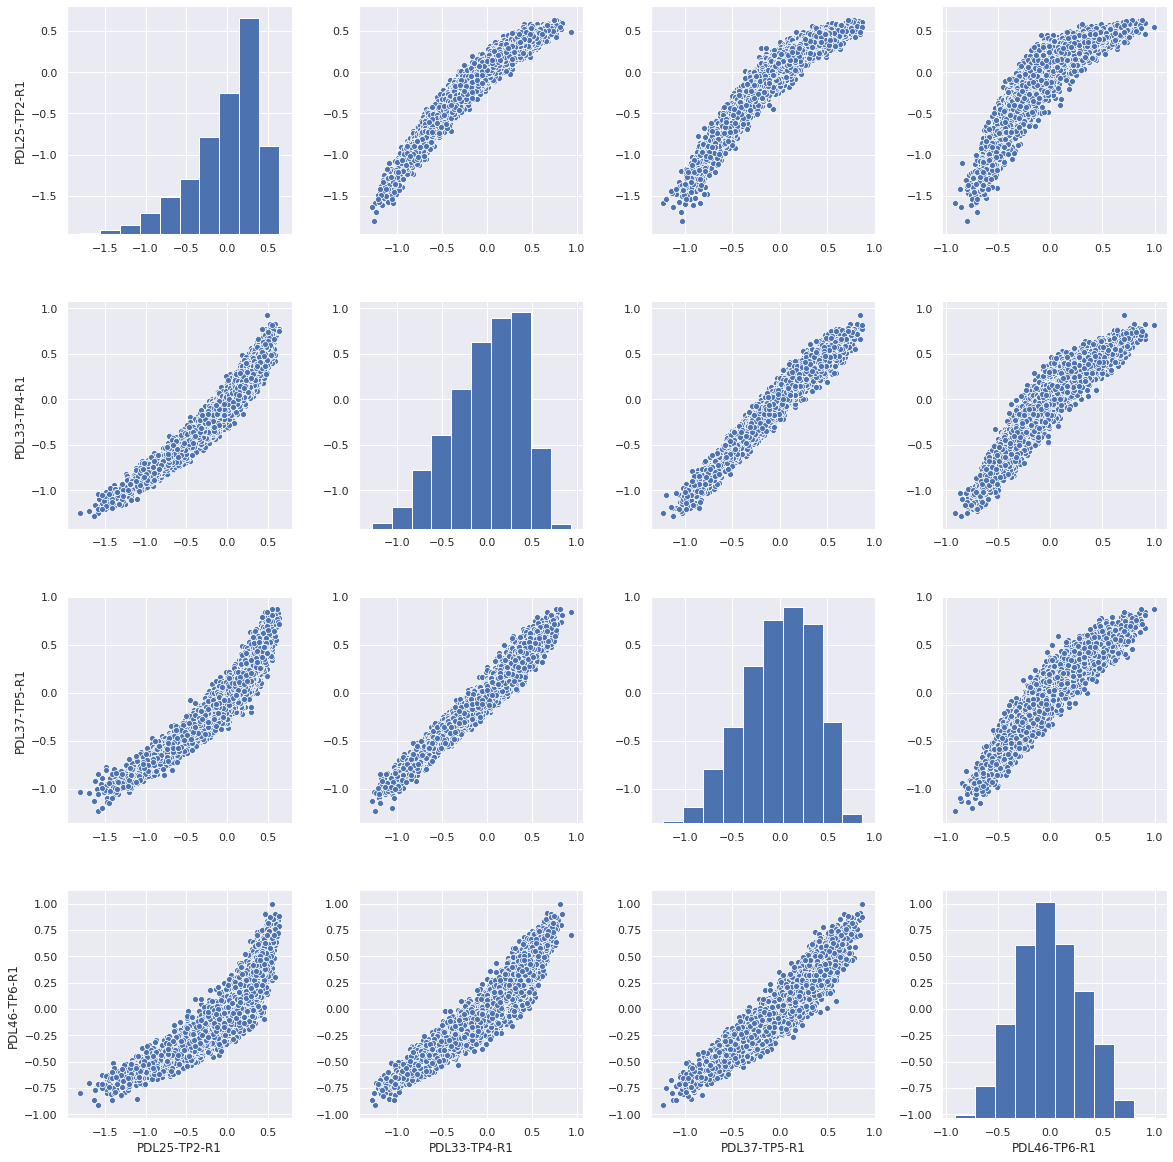

In [9]:
sns.set()
g=sns.pairplot(df2,size=4)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_PDL)):
    for j in range(len(names_PDL)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

In [10]:
mega_df = pd.concat([df1,df2],axis=1)

c1=pd.read_csv('hTERT-TP2-R1.trans.vecs.tsv',sep='\t')
chrms=c1[['chrom','start','end']]
mergeddf=pd.concat([chrms,mega_df],axis=1)
mergeddf.head()
mergeddf.to_csv('Original.tsv',index=False,sep='\t')

In [11]:
mergeddf.head()

chrom    start      end  hTERT-TP2-R1  hTERT-TP4-R1-1  hTERT-TP4-R1-2  \
0  chr1        0   250000           NaN             NaN             NaN   
1  chr1   250000   500000           NaN             NaN             NaN   
2  chr1   500000   750000           NaN             NaN             NaN   
3  chr1   750000  1000000           NaN             NaN       -0.945672   
4  chr1  1000000  1250000     -1.081616       -0.987544       -0.992423   

   hTERT-TP5-R1  hTERT-TP6-R1  PDL25-TP2-R1  PDL33-TP4-R1  PDL37-TP5-R1  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN     -1.240375           NaN           NaN   
4     -0.853937     -0.855844     -1.255048      -1.02313     -0.898579   

   PDL46-TP6-R1  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

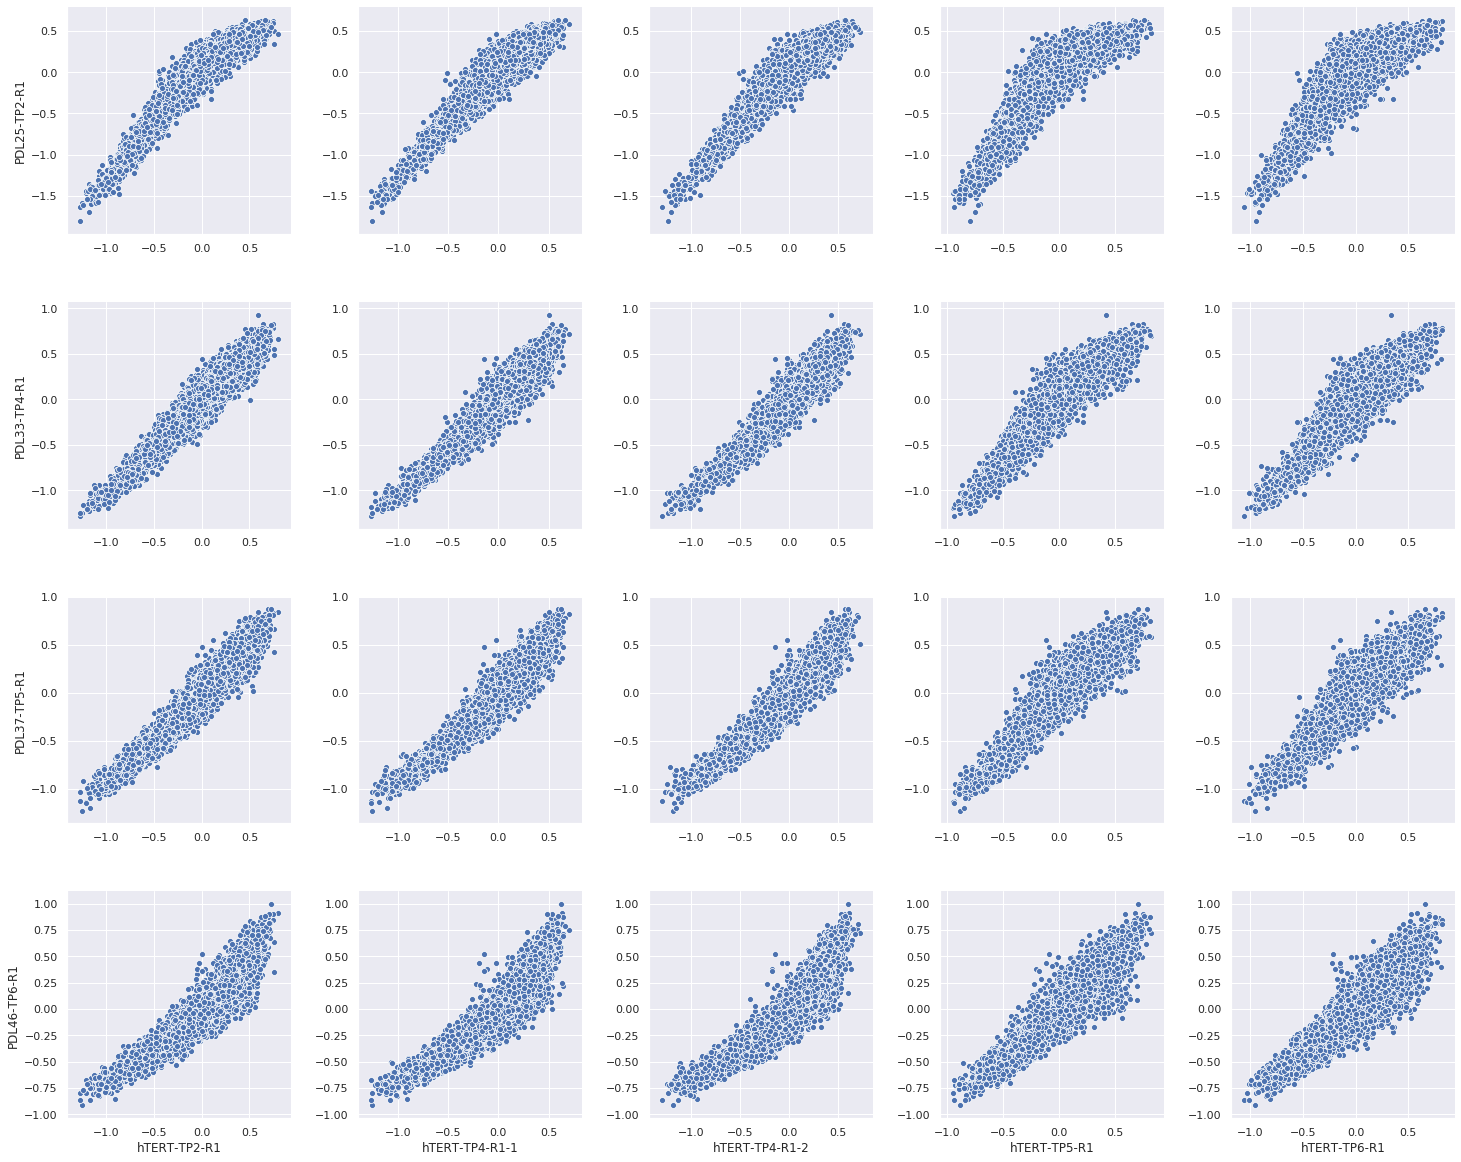

In [12]:
sns.set()
g=sns.pairplot(mega_df,size=4,
             x_vars=['hTERT-TP2-R1','hTERT-TP4-R1-1','hTERT-TP4-R1-2','hTERT-TP5-R1','hTERT-TP6-R1'],
             y_vars=['PDL25-TP2-R1','PDL33-TP4-R1','PDL37-TP5-R1','PDL46-TP6-R1'])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_PDL)):
    for j in range(len(names_hTERT)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

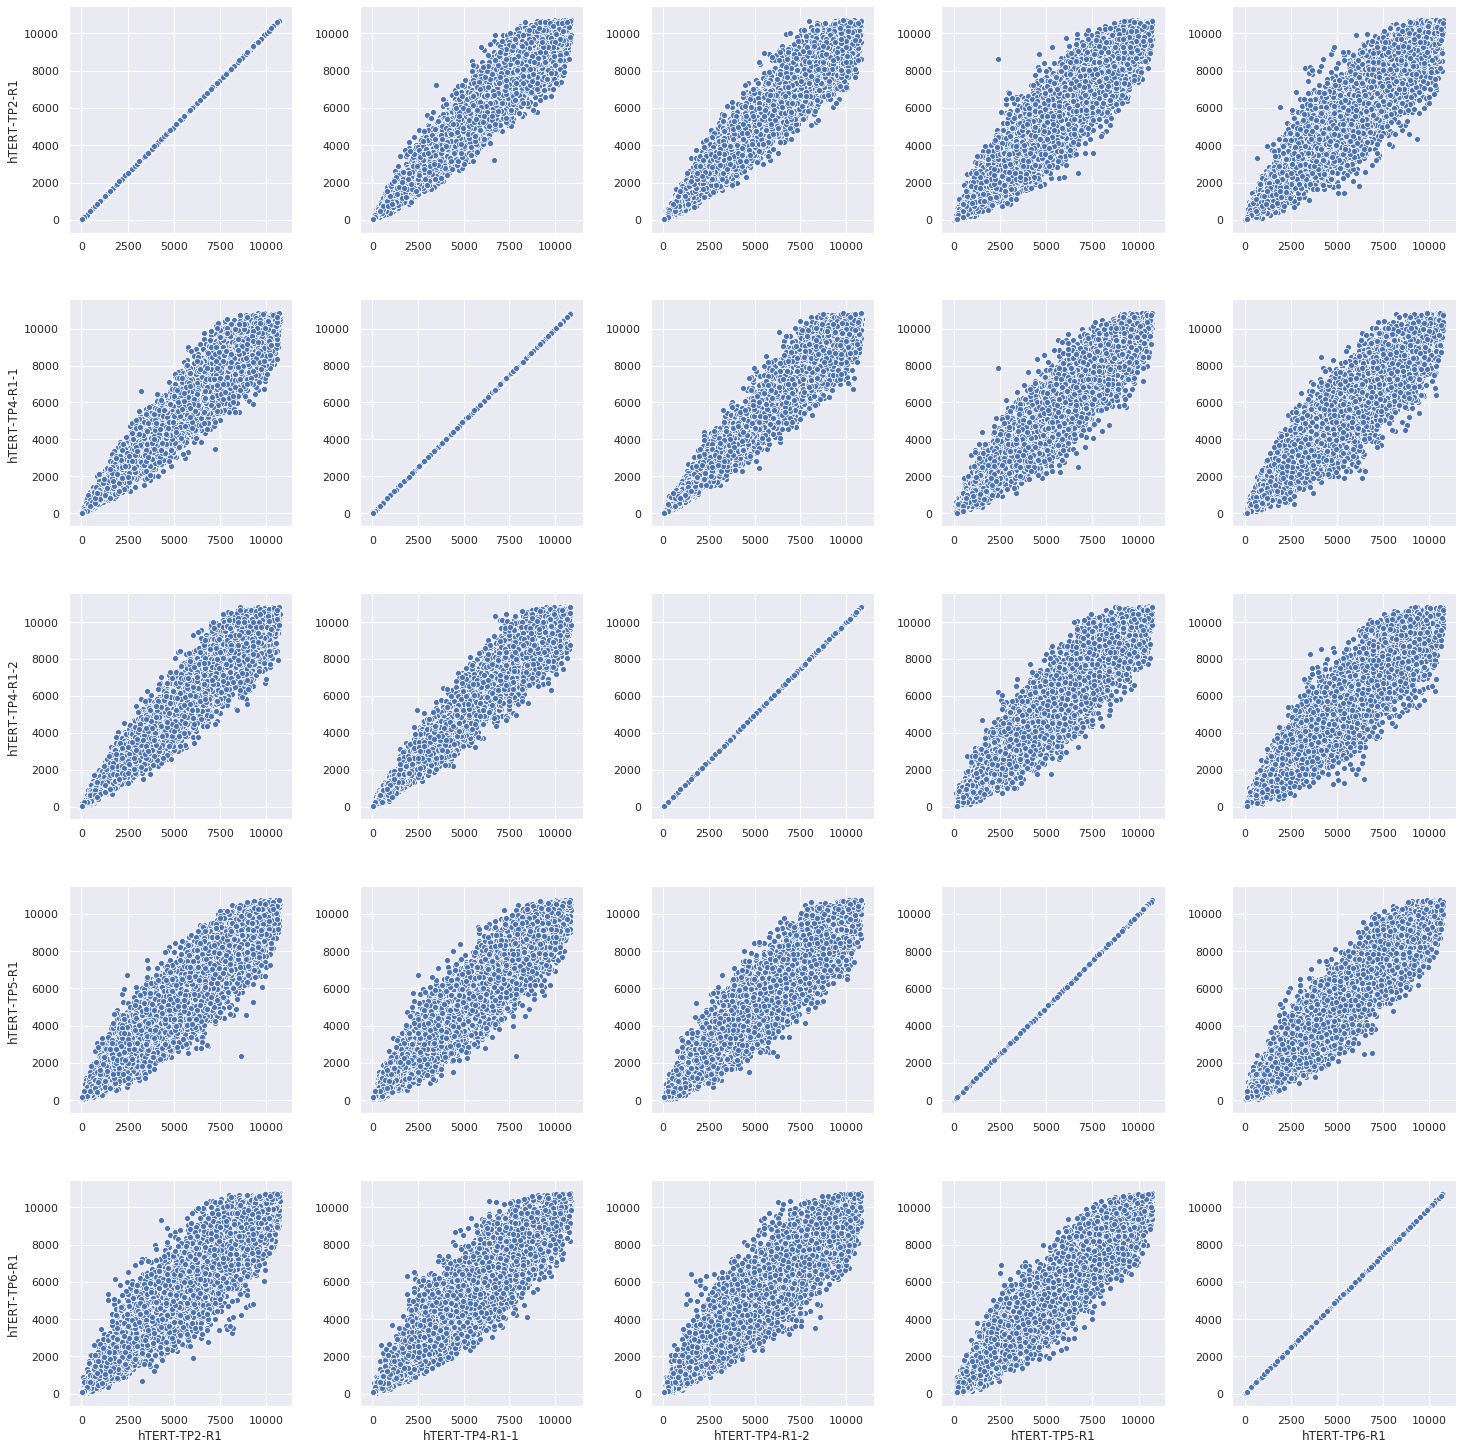

In [13]:
#Ranked Data
sns.set()
g=sns.pairplot(df1_ranked,size=4,diag_kind=None)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_hTERT)):
    for j in range(len(names_hTERT)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

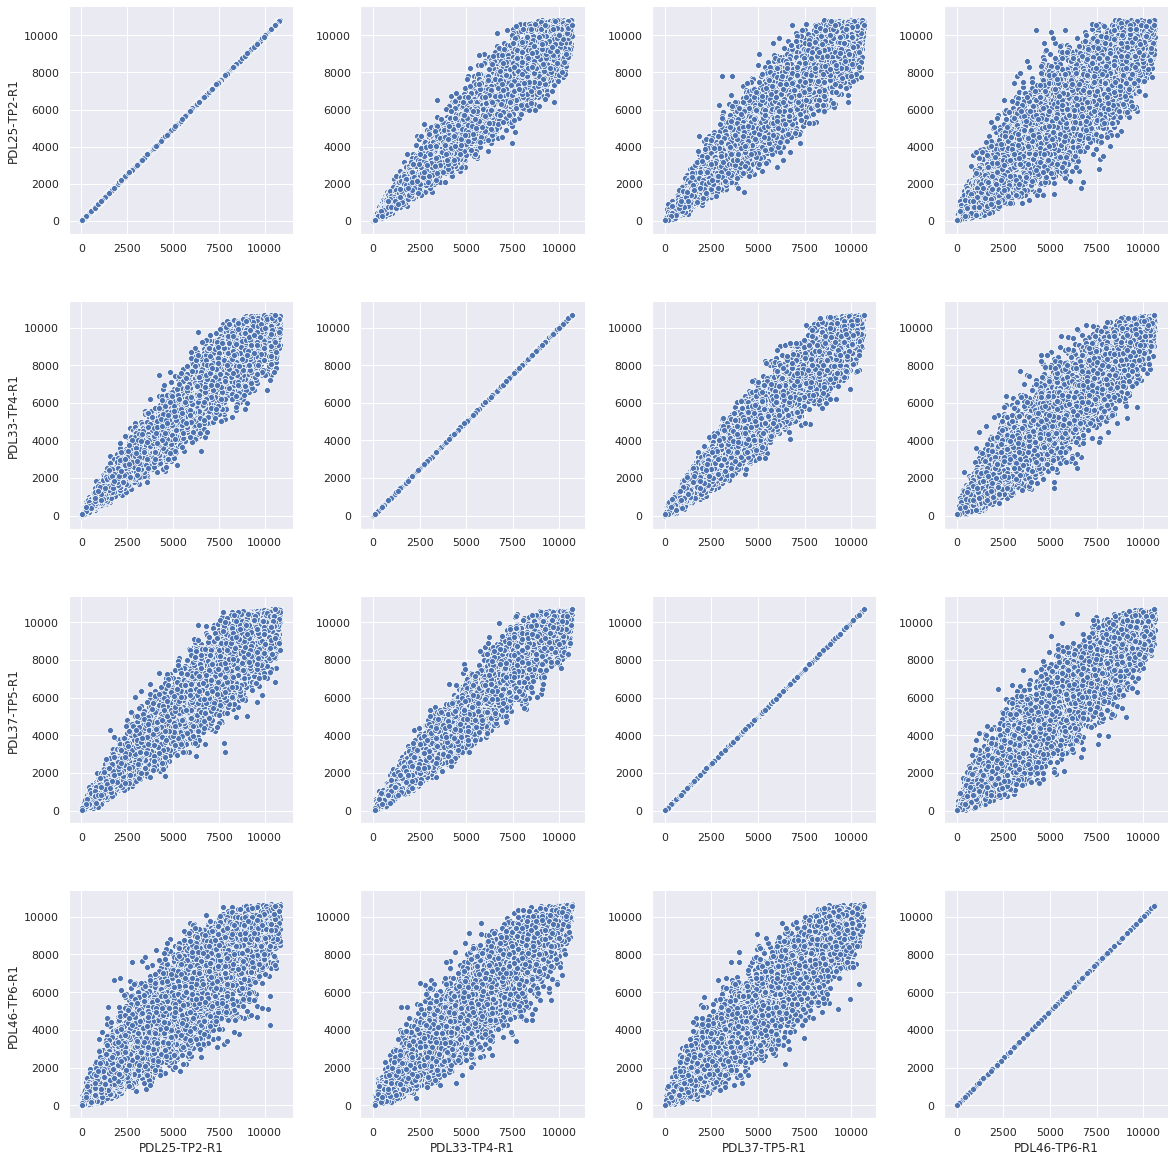

In [14]:
sns.set()
g=sns.pairplot(df2_ranked,size=4,diag_kind=None)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_PDL)):
    for j in range(len(names_PDL)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

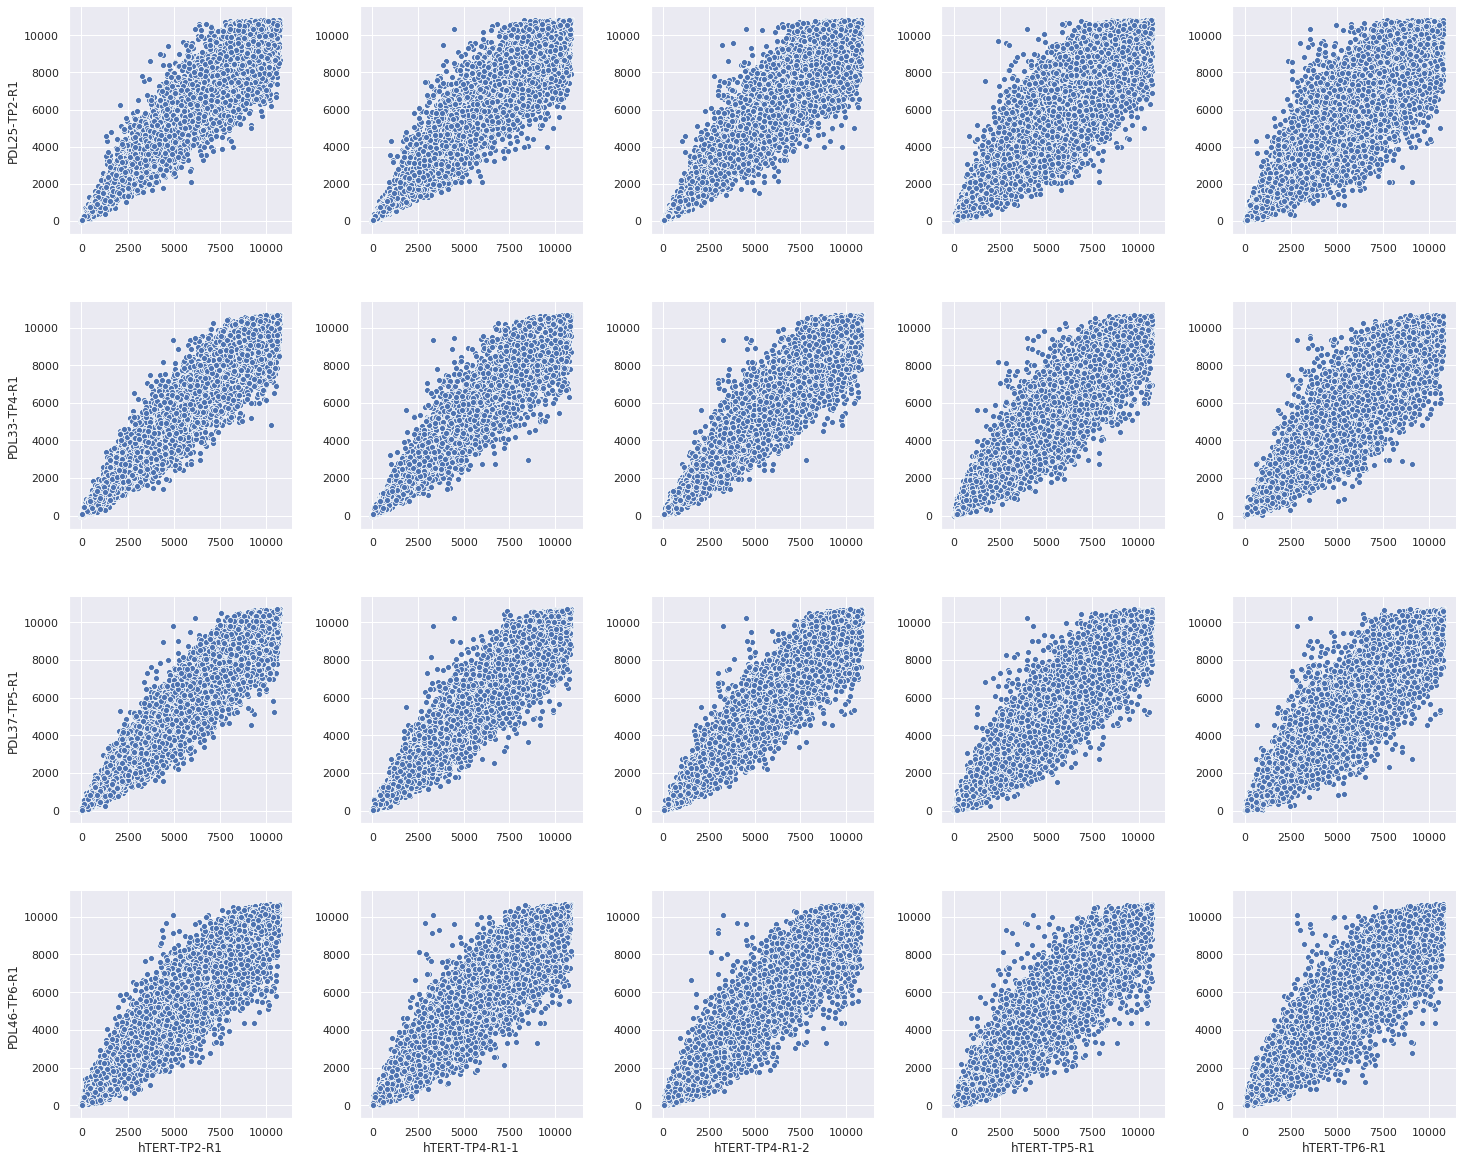

In [15]:
mega_df_ranked = pd.concat([df1_ranked,df2_ranked],axis=1)
sns.set()
g=sns.pairplot(mega_df_ranked,size=4,
             x_vars=['hTERT-TP2-R1','hTERT-TP4-R1-1','hTERT-TP4-R1-2','hTERT-TP5-R1','hTERT-TP6-R1'],
             y_vars=['PDL25-TP2-R1','PDL33-TP4-R1','PDL37-TP5-R1','PDL46-TP6-R1'])
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(len(names_PDL)):
    for j in range(len(names_hTERT)):
        g.axes[i,j].xaxis.set_tick_params(labelbottom=True)
        g.axes[i,j].yaxis.set_tick_params(labelleft=True)

In [16]:
c1=pd.read_csv('hTERT-TP2-R1.trans.vecs.tsv',sep='\t')
chrms=c1[['chrom','start','end']]
mergeddf=pd.concat([chrms,mega_df_ranked],axis=1)
mergeddf.head()
mergeddf.to_csv('Ranked.tsv',index=False,sep='\t')

In [17]:
mergeddf.head()

chrom    start      end  hTERT-TP2-R1  hTERT-TP4-R1-1  hTERT-TP4-R1-2  \
0  chr1        0   250000           NaN             NaN             NaN   
1  chr1   250000   500000           NaN             NaN             NaN   
2  chr1   500000   750000           NaN             NaN             NaN   
3  chr1   750000  1000000           NaN             NaN           110.0   
4  chr1  1000000  1250000          32.0            80.0            79.0   

   hTERT-TP5-R1  hTERT-TP6-R1  PDL25-TP2-R1  PDL33-TP4-R1  PDL37-TP5-R1  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN          97.0           NaN           NaN   
4          19.0          44.0          92.0          73.0          91.0   

   PDL46-TP6-R1  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN